# Покемон

Ход работы:
1. Обзор даннных
2. Предобработка данных 
3. Анализ данных
    


Вопросы:
* Какой тип покемонов обладает наибольшей защитой? 
* Какие пары типов (Type 1 и Type 2) встречаются чаще всего?
* Правда ли, что сумма всех очков (Total) легендарных покемонов больше чем у обычных
* Покемоны 1-го поколения имеют самый низкий процент легендарных покемонов среди всех поколений, так ли это?
* Говорят, что быстрые воины имеет слабую защиту

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

## Обзор данных

In [4]:
df=pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


* `#:` - ID for each pokemon
* `Name:` - Name of each pokemon
* `Type 1:` - Each pokemon has a type, this determines weakness/resistance to attacks
* `Type 2:` - Some pokemon are dual type and have 2
* `Total:` - sum of all stats that come after this, a general guide to how strong a pokemon is
* `HP:` - hit points, or health, defines how much damage a pokemon can withstand before fainting
* `Attack:` - the base modifier for normal attacks (eg. Scratch, Punch)
* `Defense:` - the base damage resistance against normal attacks
* `SP Atk:` - special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* `SP Def:` - the base damage resistance against special attacks
* `Speed:` - determines which pokemon attacks first each round
* `Generation`- Each generation introduces a set of new Pokemon
* `Legendary`- True/False

In [5]:
df.columns.str.lower()

Index(['#', 'name', 'type 1', 'type 2', 'total', 'hp', 'attack', 'defense',
       'sp. atk', 'sp. def', 'speed', 'generation', 'legendary'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## Предобработка данных

### Пропуски значений

В столбце 'Type 2' есть пустые значения, но в данном случае это нормально, так как не все покемоны обладают вторым типом

### Выбросы

Проверим данные на наличие выбросов 

In [7]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


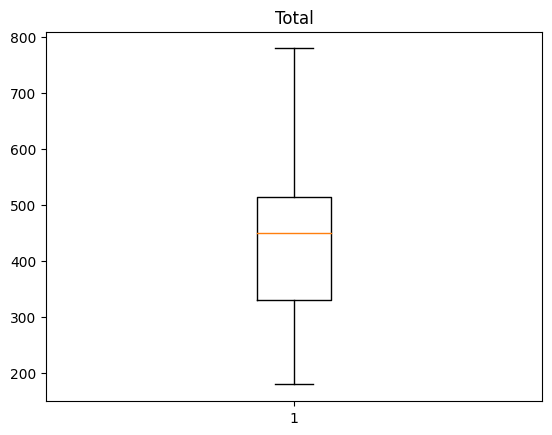

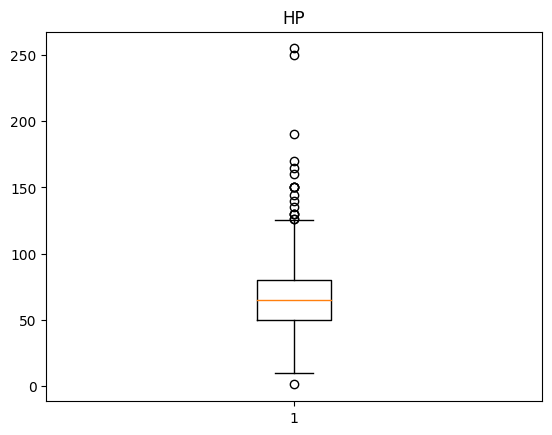

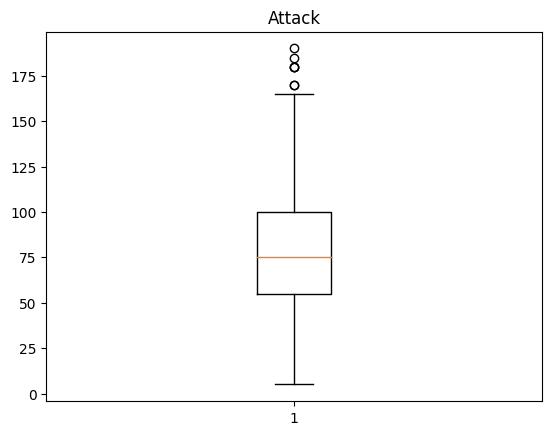

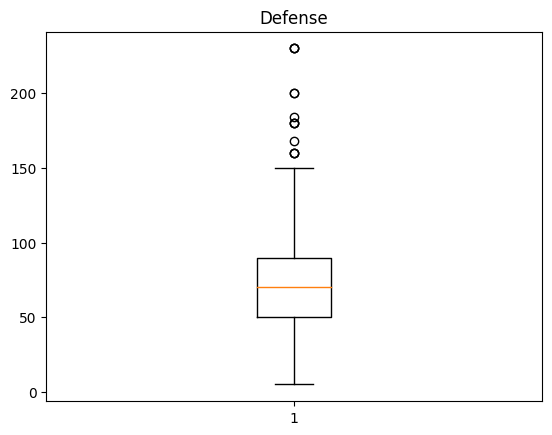

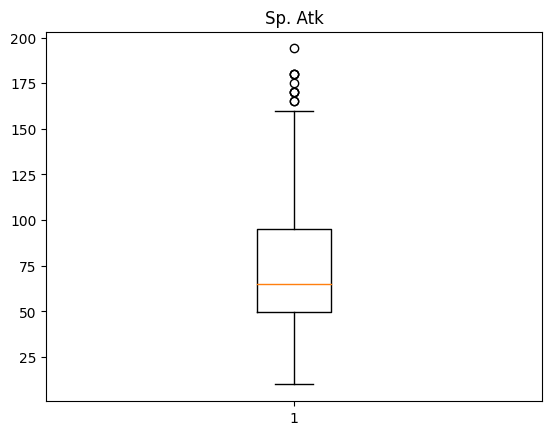

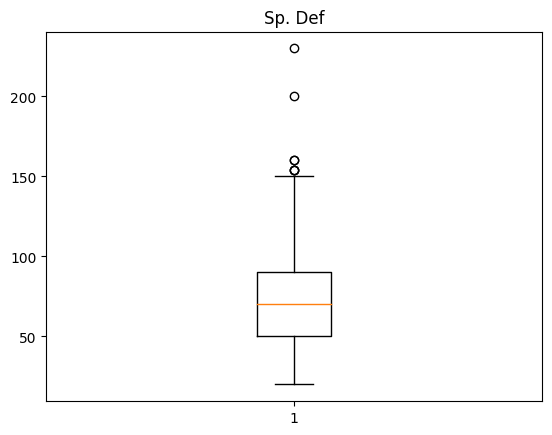

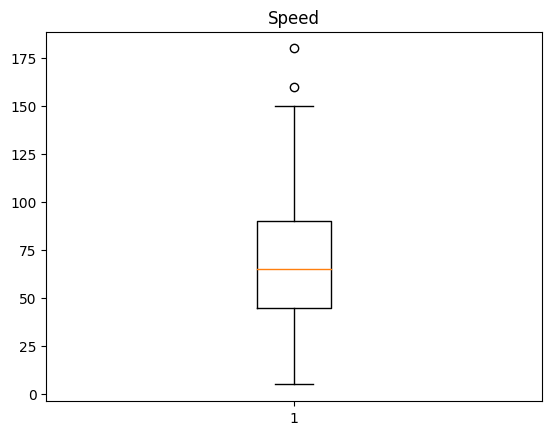

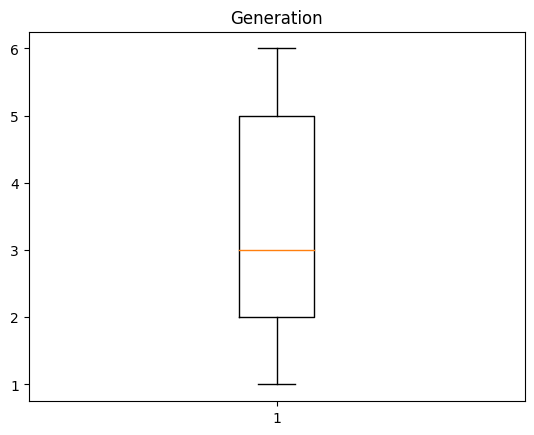

In [8]:
for i in ['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']:
    fig, ax = plt.subplots()
    ax.boxplot(df[i])
    ax.set_title(i)
    plt.show()

В некоторых признаках имеются большие значения, однако это нормально в силу того, что некоторые покемоны облодают особой редкостью с большими показателями. В данном случае гланое то, что нет слишким больших значений. 

### Поиск дубликатов

In [9]:
df.duplicated().sum()

0

### Удаление ненужных столбцов

In [10]:
del df['#']

## Анализ данных

    1) Какой тип покемонов обладает наибольшей защитой?

In [11]:
df.groupby('Type 1').mean()['Defense'].nlargest(1).reset_index()

,Type 1,Defense
0,Steel,126.37037


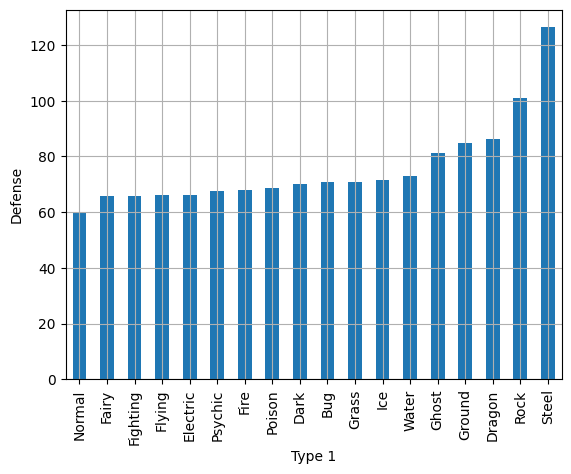

In [23]:
df_by_type1_ = df.groupby('Type 1').agg('mean')['Defense'].sort_values()
df_by_type1_.plot(kind='bar',grid=True)
plt.ylabel('Defense')
plt.show()

    2) Какие пары типов (Type 1 и Type 2) встречаются чаще всего?

In [13]:
df.groupby(['Type 1' ,'Type 2']).count()['Name'].sort_values(ascending=False).reset_index()

,Type 1,Type 2,Name
0,Normal,Flying,24
1,Grass,Poison,15
2,Bug,Flying,14
3,Bug,Poison,12
4,Ghost,Grass,10
...,...,...,...
131,Fire,Rock,1
132,Ice,Ghost,1
133,Fire,Dragon,1
134,Fighting,Flying,1


    3) Правда ли что значение очков (Total) легендарных покемонов больше чем у обычных?
    
    

Так как нам известен весь набор покемонов, то ошибка выборки отсутствует. Нет смысла проводить тесты, достаточно будет сравнить средние или медианы 

In [14]:
print('mean: ',df[df['Legendary']==True]['Total'].mean())
print('median: ',df[df['Legendary']==True]['Total'].median())

mean:  637.3846153846154
median:  600.0


In [15]:
print('mean: ',df[df['Legendary']==False]['Total'].mean())
print('median: ',df[df['Legendary']==False]['Total'].median())

mean:  417.21360544217686
median:  425.0


<Axes: xlabel='Legendary'>

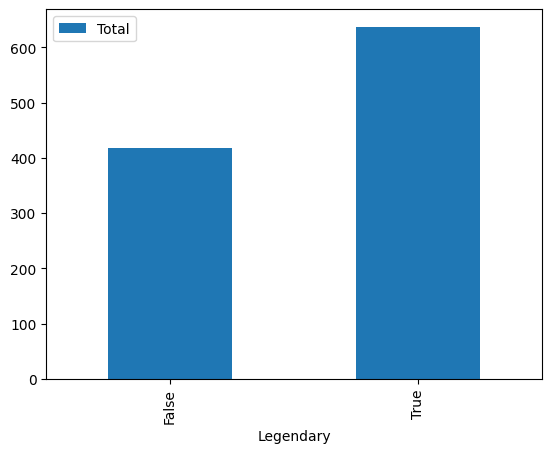

In [16]:
df_by_Legendary = df.groupby('Legendary').agg('mean')[['Total']].sort_values(by='Total')
df_by_Legendary.plot(kind='bar',stacked=True)

    4) Покемоны 1-го поколения имеют самый низкий процент легендарных покемонов среди всех поколений.

In [17]:
df[df['Legendary']==True].groupby('Generation').count()['Name']/(df.groupby('Generation').count()['Name'])*100

Generation
1     3.614458
2     4.716981
3    11.250000
4    10.743802
5     9.090909
6     9.756098
Name: Name, dtype: float64

<Axes: xlabel='Generation'>

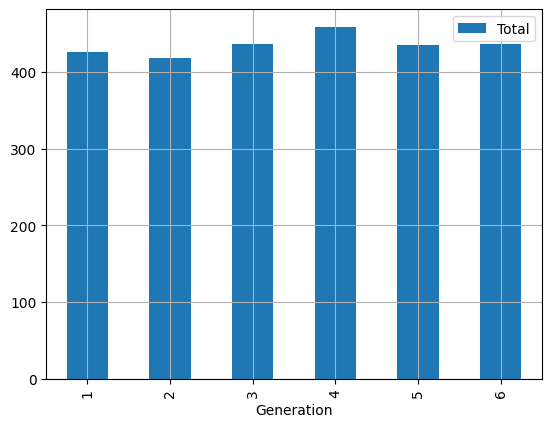

In [18]:
df_by_generation = df.groupby('Generation').agg('mean')[['Total']].sort_values(by='Generation')
df_by_generation.plot(kind='bar',stacked=True,grid=True)


### Говорят, что быстрые воины имеет слабую защиту 

Проверим это, посчитав корреляцию между `Defense` и `Speed`

In [25]:
df.corr()[['Defense','Speed']].style.background_gradient(axis=0)

,Defense,Speed
Total,0.612787,0.575943
HP,0.239622,0.175952
Attack,0.438687,0.381240
Defense,1.000000,0.015227
Sp. Atk,0.223549,0.473018
Sp. Def,0.510747,0.259133
Speed,0.015227,1.000000
Generation,0.042419,-0.023121
Legendary,0.246377,0.326715


Нет, корреляция в случае покемонов очень слабая